In [1]:
import gym
import numpy as np

from numpy.random import random, choice
import matplotlib.pyplot as plt
plt.style.use('ggplot')

env = gym.make('FrozenLake8x8-v0')

# parameters 
#episodes = 10000
gamma = 0.9
alpha = 0.1
epsilon = 1.0
epsilon_decay = 0.999 # decay per episode
eligibility_decay = 0.3

n_states = env.observation_space.n
n_actions = env.action_space.n
Q = np.zeros((n_states, n_actions))
returns = []

In [2]:
def epsilon_greedy_action(state, Q, epsilon):

    values = Q[state,:] 
    max_value = max(values)
    no_actions = len(values)

    greedy_actions = [a for a in range(no_actions) if values[a] == max_value]
    
    explore = (random() < epsilon)
  
    if explore:
        return np.random.choice([0,1,2,3])
    else:
        return np.random.choice([a for a in greedy_actions])

In [3]:
def QLearning(env, episodes, alpha, epsilon, gamma):
    
    Q = np.zeros((n_states, n_actions))
    
    for episode in range(episodes):

        state = env.reset()

        while True:
            
            action = epsilon_greedy_action(state, Q, epsilon)
            new_state, reward, done, info = env.step(action)
        
            delta = reward + gamma * max(Q[new_state,:]) - Q[state, action]
            Q[state, action] = Q[state, action] + alpha * delta 

            state= new_state

            if done:
                break
    return Q

In [4]:
final_Q = QLearning(env, 100000, alpha, epsilon, gamma)

In [5]:
final_Q

array([[7.85761941e-03, 8.13694622e-03, 8.88282264e-03, 8.71096112e-03],
       [9.53232490e-03, 1.01659271e-02, 1.04935602e-02, 1.19339275e-02],
       [1.35175100e-02, 1.36772162e-02, 1.55719815e-02, 1.63574502e-02],
       [1.77376300e-02, 1.82813075e-02, 2.25226036e-02, 1.94401049e-02],
       [2.50065543e-02, 2.81630258e-02, 2.92215234e-02, 2.39841702e-02],
       [3.19415014e-02, 3.82407504e-02, 3.78817031e-02, 3.32481941e-02],
       [4.38467350e-02, 4.53950407e-02, 4.63736716e-02, 3.98549428e-02],
       [4.65277061e-02, 4.66728205e-02, 4.85382742e-02, 4.34324768e-02],
       [6.82685610e-03, 7.67706983e-03, 7.98260485e-03, 8.39984720e-03],
       [7.89957433e-03, 8.46988529e-03, 9.50175584e-03, 1.08582202e-02],
       [1.16163183e-02, 1.11838978e-02, 1.44400717e-02, 1.31226125e-02],
       [1.26062965e-02, 1.45140836e-02, 1.37075645e-02, 2.25325610e-02],
       [2.56811861e-02, 2.88865993e-02, 3.08530630e-02, 2.87671749e-02],
       [3.33394430e-02, 4.12722051e-02, 4.50731352e

In [6]:
V = [float(max(i)) for i in final_Q]

In [7]:
V

[0.008882822639003134,
 0.011933927519928058,
 0.01635745020011791,
 0.02252260360934656,
 0.029221523376694317,
 0.03824075038860419,
 0.04637367162058971,
 0.048538274155357816,
 0.008399847198087564,
 0.010858220238286507,
 0.014440071747142099,
 0.02253256104753899,
 0.030853062954368987,
 0.04507313524863638,
 0.055077272111902664,
 0.05890880403965978,
 0.006779167467379495,
 0.008300158404259406,
 0.008428608361366493,
 0.0,
 0.03501960177079199,
 0.0525882169806145,
 0.07306098102037781,
 0.09242051114520537,
 0.0054889116178688125,
 0.006528556659487213,
 0.007553439133883553,
 0.01099117343249838,
 0.020863907500816407,
 0.0,
 0.08921875081431016,
 0.14117216403722724,
 0.004156251211916941,
 0.004750068297933428,
 0.003977584154975665,
 0.0,
 0.03448480981951959,
 0.05384537317541718,
 0.09017430836151791,
 0.20777534363658354,
 0.002382533305208467,
 0.0,
 0.0,
 0.01083220782125987,
 0.022650126972387403,
 0.03211334820031564,
 0.0,
 0.31293092657934235,
 0.0013417545028825

In [8]:
values = np.array(V).reshape(8,8) 

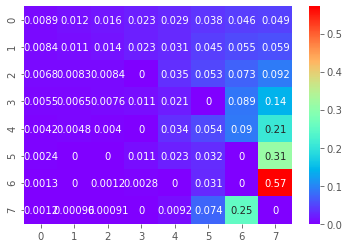

In [9]:
import seaborn as sns

sns.heatmap(values,annot=values,cmap='rainbow')

In [10]:
def get_policy(env, V):
    
    policy = np.zeros((n_states,n_actions))
    for state in range(env.nS):
        action_values = np.zeros(env.nA)
        for action in range(env.nA):
            for prob,next_state,reward,terminated in env.P[state][action]:
                action_values[action] += prob * (reward + gamma * V[next_state])
        
        best_action = np.argmax(action_values) 
        policy[state][best_action] = 1
    return policy

In [11]:
policy = get_policy(env,V)
policy

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],


In [12]:
n_iteration = 10
highscore = 0
data_row = []
for n_iter in range(n_iteration):

    points = 0 # keep track of the reward each episode
    data_dict = {}
    for i_episode in range(5): # run 20 episodes
        print ('_'*50)
        observation = env.reset()
        while True: # run until episode is done
            #grid.render()
            action = np.argmax(policy[observation])
            observation, reward, done, info = env.step(action)
            points += reward
            if done:
                env.render()
                #print (observation, reward, done, info)

                if points > highscore: # record high score
                    highscore = points
                break
    data_dict['run'] = n_iter
    data_dict['Points']=  points
    data_row.append(data_dict)

__________________________________________________
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
__________________________________________________
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
__________________________________________________
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
__________________________________________________
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
__________________________________________________
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
__________________________________________________
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
__________________________________________________
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
__________________________________________________
  (Right)
SFFFFFFF
